In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm

In [88]:
assessor_dir = 'datasets/assessorSequential.csv' 
df = pd.read_csv(assessor_dir)
# assessor_df = assessor_df_cleaned(assessor_df)

In [89]:
df.drop(columns=['Unnamed: 0', 'PIN','Township Code','Neighborhood Code','Sale Price','Age','ZIP','Longitude','Latitude'], inplace=True)

In [90]:
df[~df.isin(['NaN','NaT']).any(axis=1)]
df.shape
df.dropna(inplace=True)
df.shape

(992, 14)

In [91]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [92]:
draw_cols = df.columns[2:13]
draw_cols

Index(['X1st.Draw', 'X2nd.Draw', 'X3rd.Draw', 'X4th.Draw', 'X5th.Draw',
       'X6th.Draw', 'X7th.Draw', 'X8th.Draw', 'X9th.Draw', 'X10th.Draw',
       'X11th.Draw'],
      dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

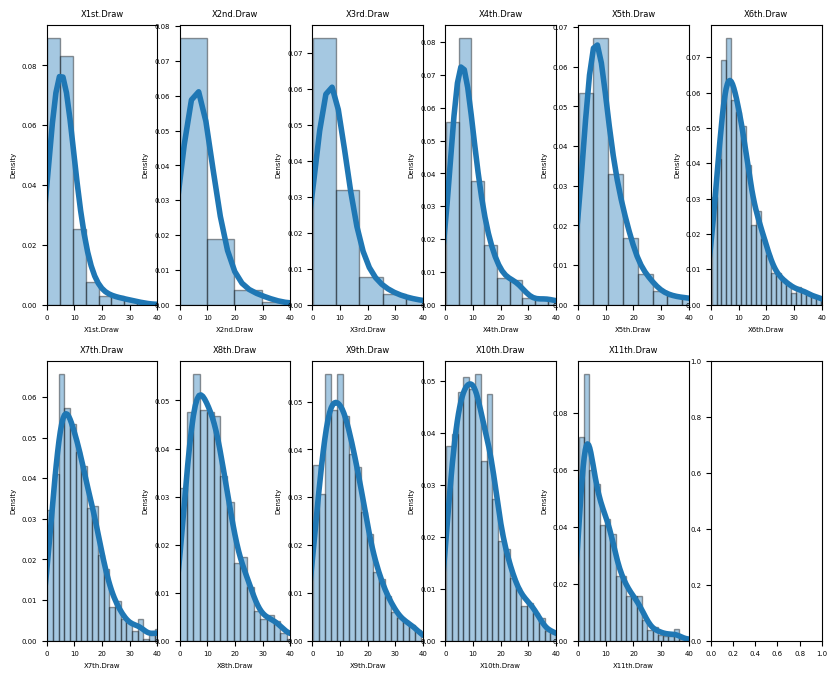

In [93]:
fig,axs = plt.subplots(2,6)
plt.rcParams['figure.figsize'] = 10, 8
# plt.rcParams['font.size'] = 5

for i, ax in zip(range(len(draw_cols)), axs.flatten()):
    sns.distplot(df[draw_cols[i]], ax=ax, hist=True, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax.set_xlim(0, 40)
    ax.set_title(draw_cols[i])

plt.show()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

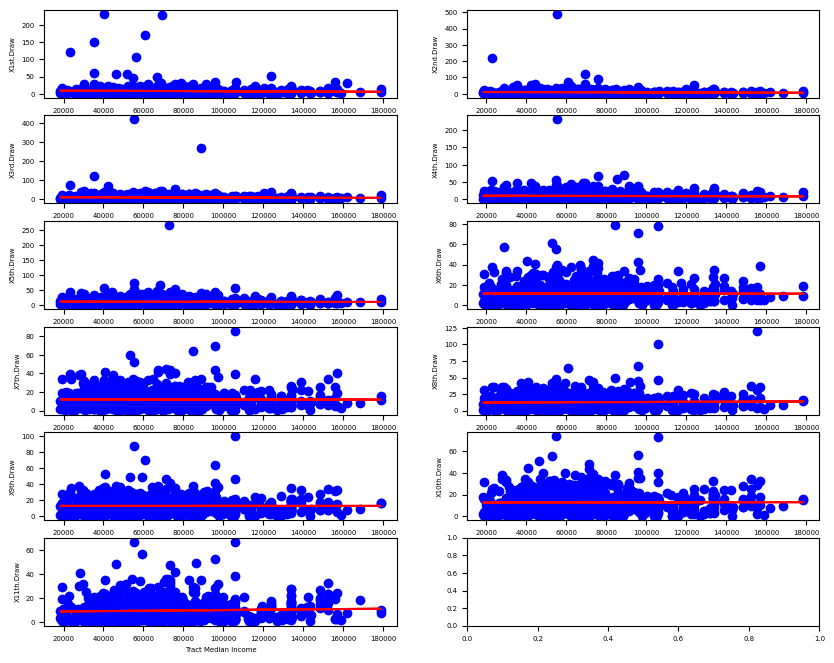

In [95]:
fig,axs = plt.subplots(6,2)
plt.rcParams['figure.figsize'] = 10, 8

for i, ax in zip(range(len(draw_cols)), axs.flatten()):
    x = df['Tract Median Income'].values.reshape(-1,1)
    y = df[draw_cols[i]].values.reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(x, y)
    y_pred = regressor.predict(x)

    ax.scatter(x, y, color='blue', marker='o')
    ax.plot(x, y_pred, color='red')
    # ax.set_title(draw_cols[i])
    ax.set_xlabel('Tract Median Income')
    ax.set_ylabel(draw_cols[i])
 
plt.show() 
# plt.xlabel('Tract Median Income')
# plt.ylabel('6th draw')
 
# plt.scatter(x=df['Tract Median Income'], y=df['X6th.Draw'], marker='o')
# plt.show()

In [96]:
from patsy import dmatrices

In [97]:
for i in range(len(draw_cols)):
    df['draw_{}'.format(i+1)] = df[draw_cols[i]]

df.drop(columns=draw_cols, inplace=True)

In [98]:
df

,Date.Sampled,Address,Tract Median Income,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,draw_10,draw_11
0,9/4/2019,100XX S BELL AVE,122727.0,1.52,1.37,1.59,2.53,2.44,1.90,2.45,2.92,3.75,3.86,4.35
1,7/16/2016,100XX S CALHOUN AVE,44423.0,3.70,2.62,8.83,13.80,13.20,13.60,12.30,11.80,10.80,8.01,2.75
2,12/17/2019,100XX S CALUMET AVE,40612.0,4.02,5.35,6.97,6.55,17.70,16.60,12.10,11.60,12.00,11.10,8.72
3,12/14/2019,100XX S CARPENTER ST,37207.0,9.54,7.31,6.95,5.63,4.91,7.15,12.40,13.10,10.10,9.54,7.23
5,12/14/2021,100XX S LASALLE ST,39787.0,10.00,8.80,6.90,6.20,8.30,9.90,11.00,9.80,10.00,9.50,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,9/21/2021,9XX N FAIRFIELD AVE,57362.0,6.61,8.73,10.20,13.90,20.50,21.90,17.80,12.40,18.10,22.20,13.20
1802,1/26/2022,9XX W GUNNISON ST,41445.0,6.20,7.00,7.20,8.90,9.80,9.70,9.40,9.40,12.00,22.00,18.00
1804,11/22/2021,XX W 78TH ST,34657.0,11.00,11.40,8.06,8.49,21.40,28.60,29.30,19.70,18.10,17.20,7.06
1805,10/28/2021,XX W 81ST ST,39097.0,4.41,5.43,4.96,3.87,4.80,4.93,9.11,8.83,10.40,12.20,2.37


In [100]:
df['tract_income'] = df['Tract Median Income']
df.drop(columns=['Tract Median Income'], inplace=True)

In [103]:
draw_cols1 = df.columns[2:13]
draw_cols1

Index(['draw_1', 'draw_2', 'draw_3', 'draw_4', 'draw_5', 'draw_6', 'draw_7',
       'draw_8', 'draw_9', 'draw_10', 'draw_11'],
      dtype='object')

In [109]:
for cols in draw_cols1:
    y, X = dmatrices(cols + ' ~ ' + 'tract_income', data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 draw_1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.804
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.180
Time:                        01:37:13   Log-Likelihood:                -4053.4
No. Observations:                 992   AIC:                             8111.
Df Residuals:                     990   BIC:                             8121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.5603      1.182      8.088   